In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
plt.rcParams['figure.dpi'] = 300

In [3]:
x = np.zeros([64])
y = np.zeros([64])
z = np.zeros([64])

index = 0
for i in range(4):
    for j in range(4):
        for k in range(4):
            x[index] = i - 1.5
            y[index] = j - 1.5
            z[index] = k - 1.5
            index += 1

In [4]:
centi_from_monitor = 74
monitor_measurement = 30

monitor_VA_deg = np.arctan((monitor_measurement/2)/centi_from_monitor)*2*(180/np.pi);

CentiPD = monitor_measurement / monitor_VA_deg

head_centered_x = np.zeros([64])
head_centered_y = np.zeros([64])
head_centered_z = np.zeros([64])
for i in range(64):
    head_centered_x[i] = x[i]*3*CentiPD
    head_centered_y[i] = y[i]*3*CentiPD
    head_centered_z[i] = z[i]*3*CentiPD + centi_from_monitor

[-5.89069368 -5.89069368 -5.89069368 -5.89069368 -5.89069368 -5.89069368
 -5.89069368 -5.89069368 -5.89069368 -5.89069368 -5.89069368 -5.89069368
 -5.89069368 -5.89069368 -5.89069368 -5.89069368 -1.96356456 -1.96356456
 -1.96356456 -1.96356456 -1.96356456 -1.96356456 -1.96356456 -1.96356456
 -1.96356456 -1.96356456 -1.96356456 -1.96356456 -1.96356456 -1.96356456
 -1.96356456 -1.96356456  1.96356456  1.96356456  1.96356456  1.96356456
  1.96356456  1.96356456  1.96356456  1.96356456  1.96356456  1.96356456
  1.96356456  1.96356456  1.96356456  1.96356456  1.96356456  1.96356456
  5.89069368  5.89069368  5.89069368  5.89069368  5.89069368  5.89069368
  5.89069368  5.89069368  5.89069368  5.89069368  5.89069368  5.89069368
  5.89069368  5.89069368  5.89069368  5.89069368]


In [18]:
def cal_degree_diff(A, B):
    
    if np.sum(np.abs(A-B)) == 0:
        theta_degrees = 0
        
    elif np.sum(np.abs(A+B)) == 0:
        theta_degrees = 180
    
    else:
        dot_product = np.dot(A, B)

        # Calculate the magnitudes of the vectors
        magnitude_A = np.linalg.norm(A)
        magnitude_B = np.linalg.norm(B)

        # Calculate the cosine of the angle
        cos_theta = dot_product / (magnitude_A * magnitude_B)

        # Calculate the angle in radians
        theta_radians = np.arccos(cos_theta)

        # Convert the angle to degrees
        theta_degrees = np.degrees(theta_radians)
    
        if theta_degrees < 0.0001:
            theta_degrees = 0
    
    return theta_degrees

def angle_difference(theta1, theta2):
    diff = np.abs((theta1 - theta2 + np.pi) % (2 * np.pi) - np.pi)
    return diff

In [22]:
rdms = np.zeros([11, 64, 64]) #x, y, z,
                             #r, theta, r-3d, phi
                             #2d-integration, 3d-integration  
                             #r-3d-head-centered, phi-head-centered
                
for i in range(64):
    for j in range(64):
        # x
        rdms[0, i, j] = abs(x[i]-x[j])
        
        # y
        rdms[1, i, j] = abs(y[i]-y[j])
        
        # z
        rdms[2, i, j] = abs(z[i]-z[j])
        
        # r
        rdms[3, i, j] = abs(np.sqrt(np.square(x[i])+np.square(y[i]))
                            -np.sqrt(np.square(x[j])+np.square(y[j])))
        
        # theta
        rdms[4, i, j] = angle_difference(np.arctan2(y[i], x[i]), np.arctan2(y[j], x[j]))
        
        # r-3d
        rdms[5, i, j] = abs(np.sqrt(np.square(x[i])+np.square(y[i])+np.square(z[i]))
                            -np.sqrt(np.square(x[j])+np.square(y[j])+np.square(z[j])))
        
        # phi
        rdms[6, i, j] = angle_difference(np.arctan2(np.sqrt(np.square(x[i])+np.square(y[i])), z[i]),
                                         np.arctan2(np.sqrt(np.square(x[j])+np.square(y[j])), z[j]))
        
        # 2d-geometric distance
        rdms[7, i, j] = np.sqrt(np.square(x[i]-x[j])+np.square(y[i]-y[j]))
        
        # 3d-geometric distance
        rdms[8, i, j] = np.sqrt(np.square(x[i]-x[j])+np.square(y[i]-y[j])+np.square(z[i]-z[j]))
        
        # r-3d (head-centered)
        rdms[9, i, j] = abs(np.sqrt(np.square(head_centered_x[i])+np.square(head_centered_y[i])+np.square(head_centered_z[i]))
                             -np.sqrt(np.square(head_centered_x[j])+np.square(head_centered_y[j])+np.square(head_centered_z[j])))
        
        # phi (head-centered)
        rdms[10, i, j] = angle_difference(np.arctan2(np.sqrt(np.square(head_centered_x[i])+np.square(head_centered_y[i])), head_centered_z[i]),
                                         np.arctan2(np.sqrt(np.square(head_centered_x[j])+np.square(head_centered_y[j])), head_centered_z[j]))
        
np.save('model_rdms.npy', rdms)

125.26438968275465 125.26438968275465 0.0
125.26438968275465 103.26267600830485 22.00171367444981
125.26438968275465 76.73732399169515 48.527065691059505
125.26438968275465 54.735610317245346 70.52877936550931
125.26438968275465 133.491519345092 8.22712966233735
125.26438968275465 107.5484006137923 17.715989068962372
125.26438968275465 72.4515993862077 52.81279029654694
125.26438968275465 46.508480654908 78.75590902784667
125.26438968275465 133.491519345092 8.22712966233735
125.26438968275465 107.5484006137923 17.715989068962372
125.26438968275465 72.4515993862077 52.81279029654694
125.26438968275465 46.508480654908 78.75590902784667
125.26438968275465 125.26438968275465 0.0
125.26438968275465 103.26267600830485 22.00171367444981
125.26438968275465 76.73732399169515 48.527065691059505
125.26438968275465 54.735610317245346 70.52877936550931
125.26438968275465 133.491519345092 8.22712966233735
125.26438968275465 107.5484006137923 17.715989068962372
125.26438968275465 72.4515993862077 52.

In [19]:
def plot_rdm(rdm, percentile=False, rescale=False, lim=[0, 1], conditions=None, con_fontsize=12, cmap=None, title=None,
             title_fontsize=16):

    """
    Plot the RDM

    Parameters
    ----------
    rdm : array or list [n_cons, n_cons]
        A representational dissimilarity matrix.
    percentile : bool True or False. Default is False.
        Rescale the values in RDM or not by displaying the percentile.
    rescale : bool True or False. Default is False.
        Rescale the values in RDM or not.
        Here, the maximum-minimum method is used to rescale the values except for the
        values on the diagnal.
    lim : array or list [min, max]. Default is [0, 1].
        The corrs view lims.
    conditions : string-array or string-list. Default is None.
        The labels of the conditions for plotting.
        conditions should contain n_cons strings, If conditions=None, the labels of conditions will be invisible.
    con_fontsize : int or float. Default is 12.
        The fontsize of the labels of the conditions for plotting.
    cmap : matplotlib colormap. Default is None.
        The colormap for RDM.
        If cmap=None, the ccolormap will be 'jet'.
    title : string-array. Default is None.
        The title of the figure.
    title_fontsize : int or float. Default is 16.
        The fontsize of the title.
    """

    if len(np.shape(rdm)) != 2 or np.shape(rdm)[0] != np.shape(rdm)[1]:

        return "Invalid input!"

    # get the number of conditions
    cons = rdm.shape[0]

    crdm = copy.deepcopy(rdm)

    # if cons=2, the RDM cannot be plotted.
    if cons == 2:
        print("The shape of RDM cannot be 2*2. Here NeuroRA cannot plot this RDM.")

        return None

    # determine if it's a square
    a, b = np.shape(crdm)
    if a != b:
        return None

    if percentile == True:

        v = np.zeros([cons * cons, 2], dtype=np.float)
        for i in range(cons):
            for j in range(cons):
                v[i * cons + j, 0] = crdm[i, j]

        index = np.argsort(v[:, 0])
        m = 0
        for i in range(cons * cons):
            if i > 0:
                if v[index[i], 0] > v[index[i - 1], 0]:
                    m = m + 1
                v[index[i], 1] = m

        v[:, 0] = v[:, 1] * 100 / m

        for i in range(cons):
            for j in range(cons):
                crdm[i, j] = v[i * cons + j, 0]

        if cmap == None:
            plt.imshow(crdm, extent=(0, 1, 0, 1), cmap=plt.cm.jet, clim=(0, 100))
        else:
            plt.imshow(crdm, extent=(0, 1, 0, 1), cmap=cmap, clim=(0, 100))

    # rescale the RDM
    elif rescale == True:

        # flatten the RDM
        vrdm = np.reshape(rdm, [cons * cons])
        # array -> set -> list
        svrdm = set(vrdm)
        lvrdm = list(svrdm)
        lvrdm.sort()

        # get max & min
        maxvalue = lvrdm[-1]
        minvalue = lvrdm[1]

        # rescale
        if maxvalue != minvalue:

            for i in range(cons):
                for j in range(cons):

                    # not on the diagnal
                    if i != j:
                        crdm[i, j] = float((crdm[i, j] - minvalue) / (maxvalue - minvalue))

        # plot the RDM
        min = lim[0]
        max = lim[1]
        if cmap == None:
            plt.imshow(crdm, extent=(0, 1, 0, 1), cmap=plt.cm.jet, clim=(min, max))
        else:
            plt.imshow(crdm, extent=(0, 1, 0, 1), cmap=cmap, clim=(min, max))

    else:

        # plot the RDM
        min = lim[0]
        max = lim[1]
        if cmap == None:
            plt.imshow(crdm, extent=(0, 1, 0, 1), cmap=plt.cm.jet, clim=(min, max))
        else:
            plt.imshow(crdm, extent=(0, 1, 0, 1), cmap=cmap, clim=(min, max))

    # plt.axis("off")
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14, length=0)
    font = {'size': 18}

    if percentile == True:
        cb.set_label("Dissimilarity (percentile)", fontdict=font)
    elif rescale == True:
        cb.set_label("Dissimilarity (Rescaling)", fontdict=font)
    else:
        cb.set_label("Dissimilarity", fontdict=font)

    if conditions != None:
        print("1")
        step = float(1 / cons)
        x = np.arange(0.5 * step, 1 + 0.5 * step, step)
        y = np.arange(1 - 0.5 * step, -0.5 * step, -step)
        plt.xticks(x, conditions, fontsize=con_fontsize, rotation=30, ha="right")
        plt.yticks(y, conditions, fontsize=con_fontsize)
    else:
        plt.axis("off")

    #plt.title(title, fontsize=title_fontsize)
    
    plt.rcParams['figure.dpi'] = 300

    plt.show()

    return 0

/var/folders/48/ln_7q6vj41sdf4mst103k9q80000gn/T/ipykernel_31463/1671351433.py:55: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  v = np.zeros([cons * cons, 2], dtype=np.float)


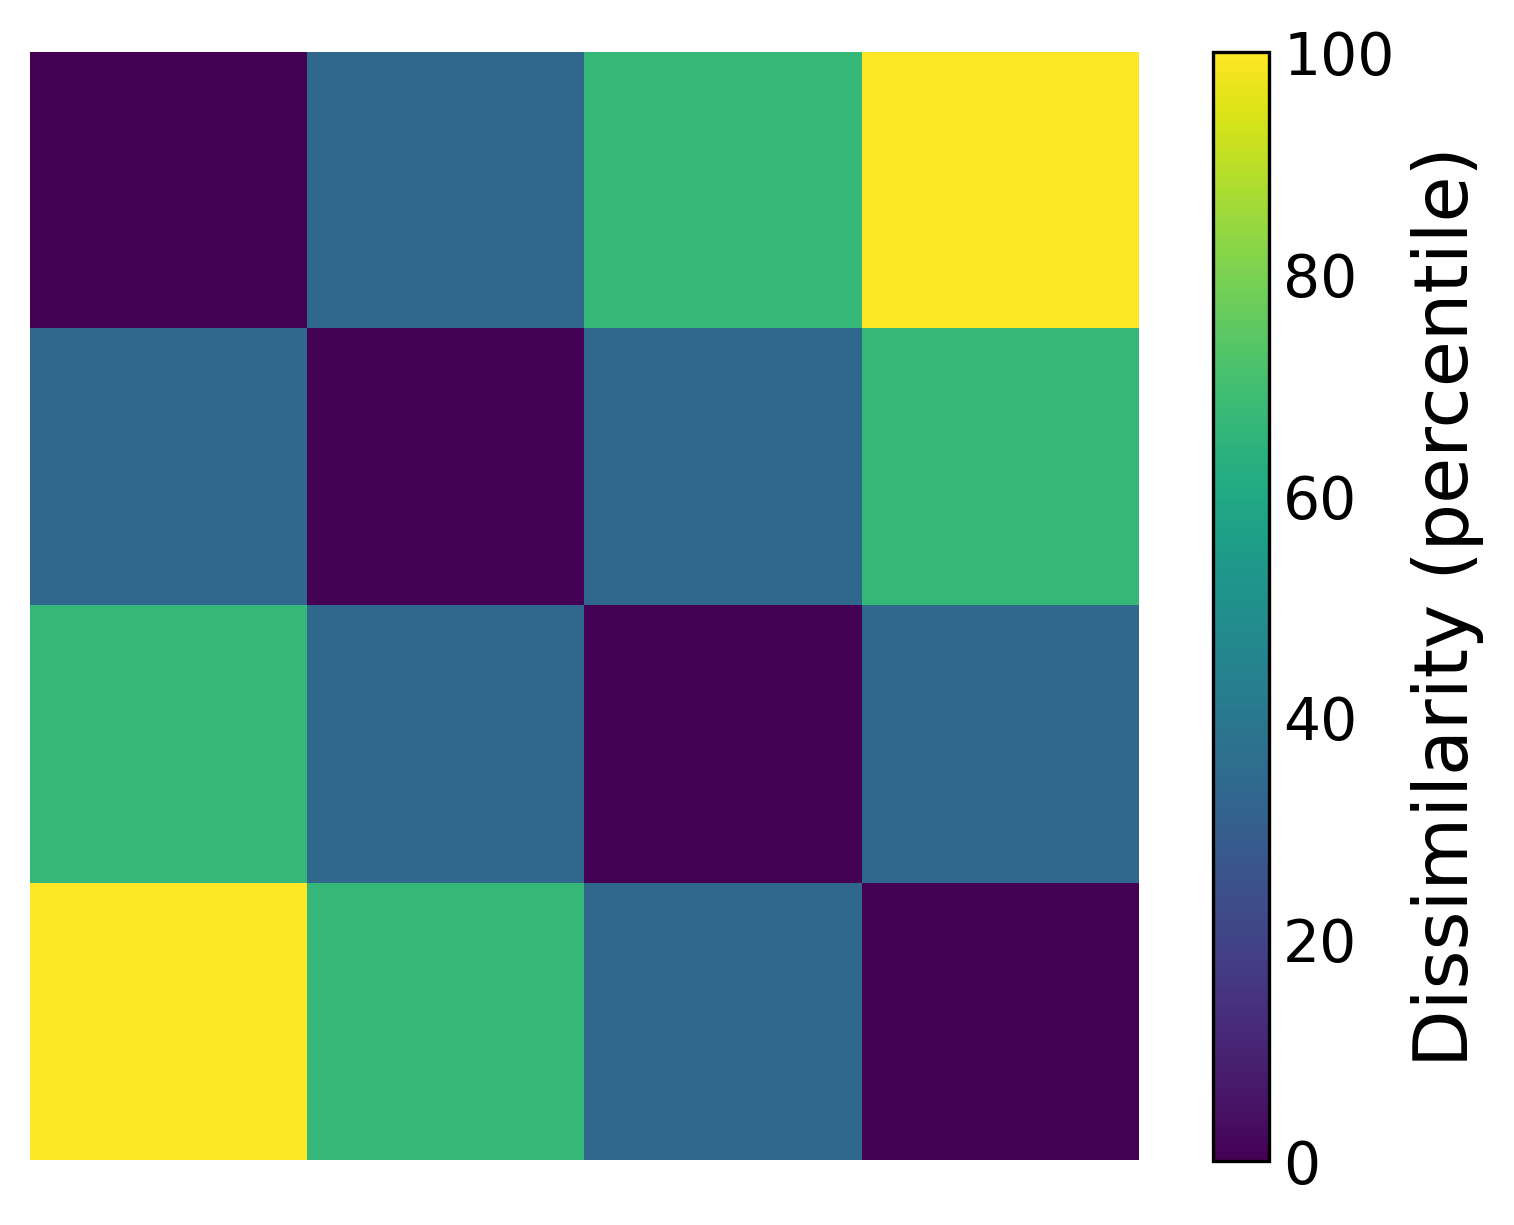

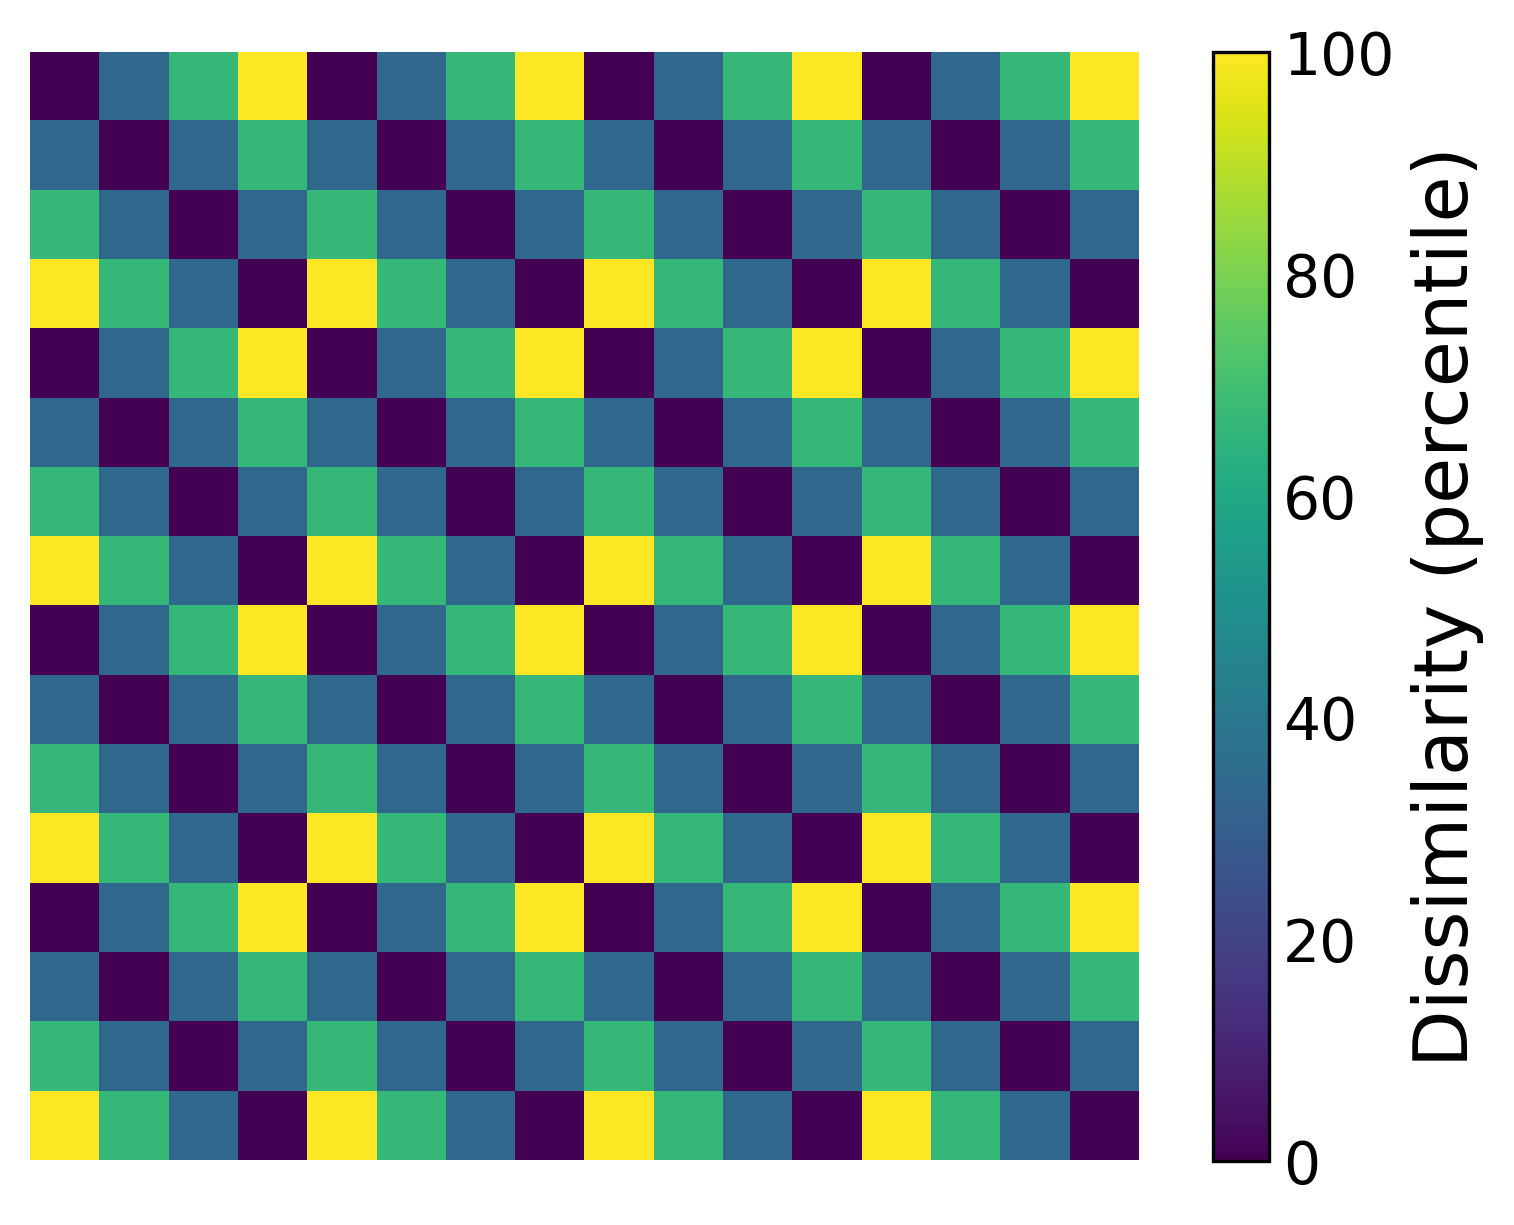

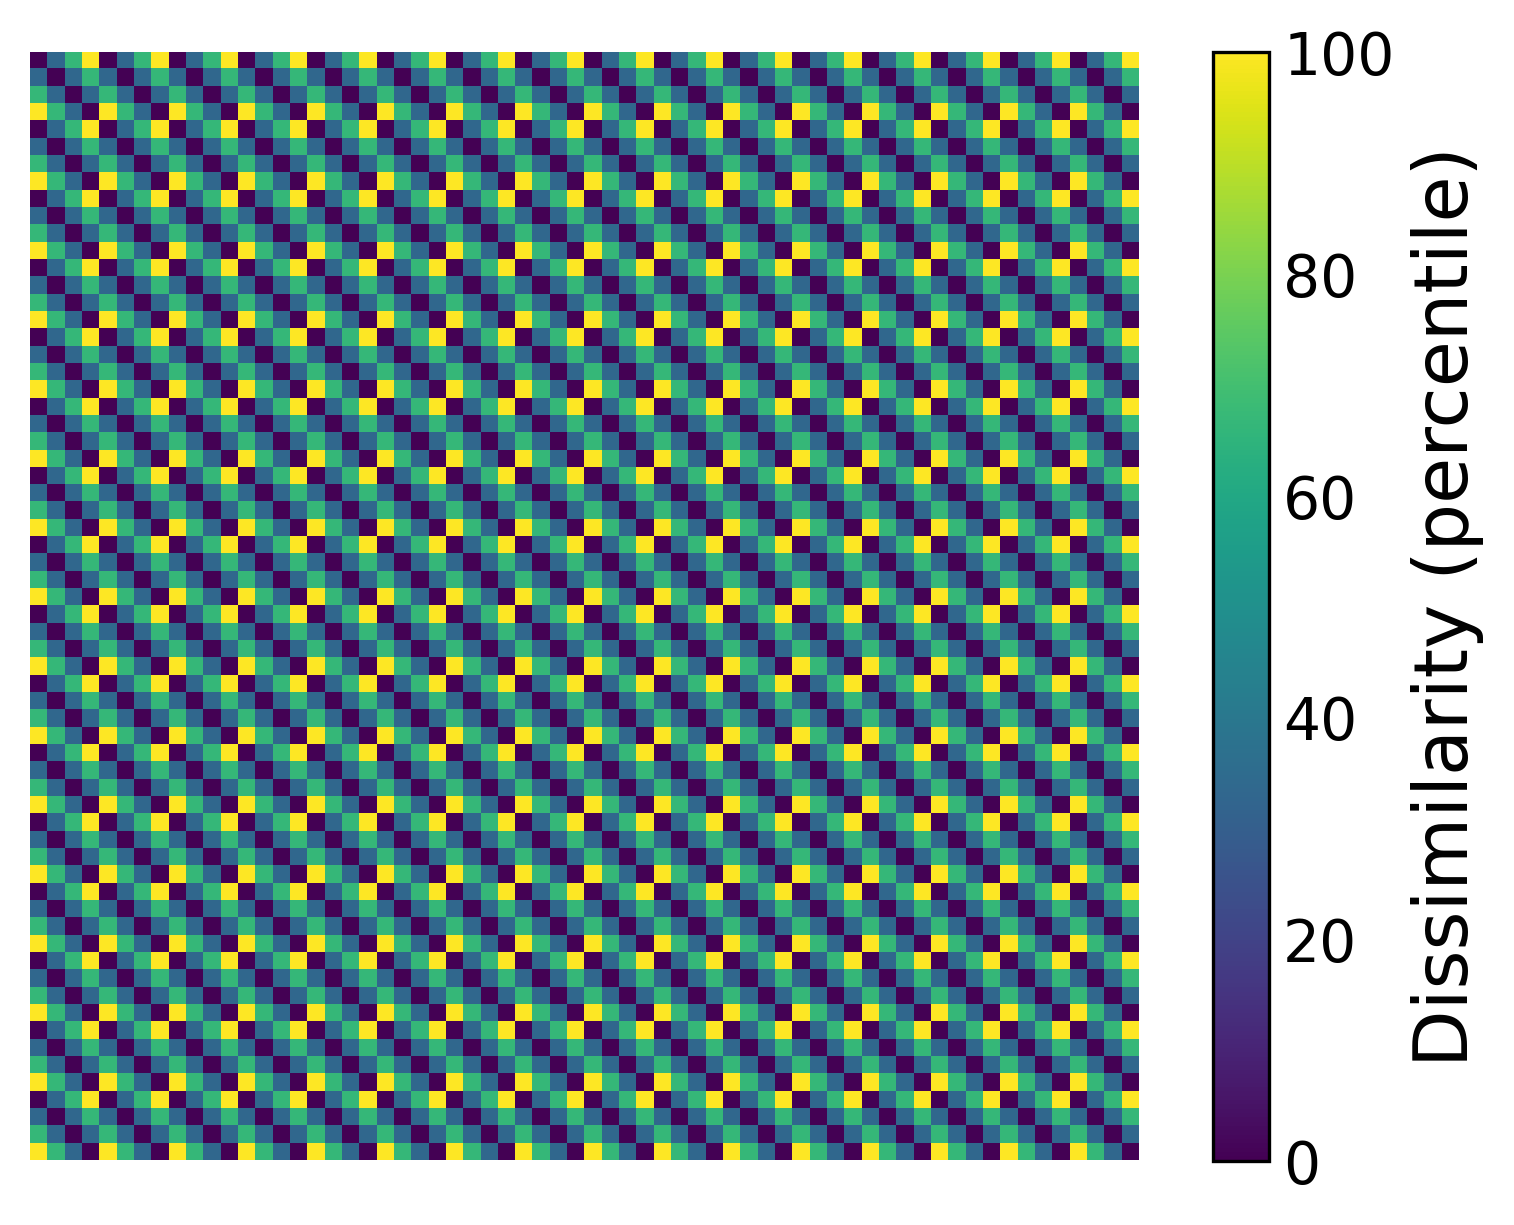

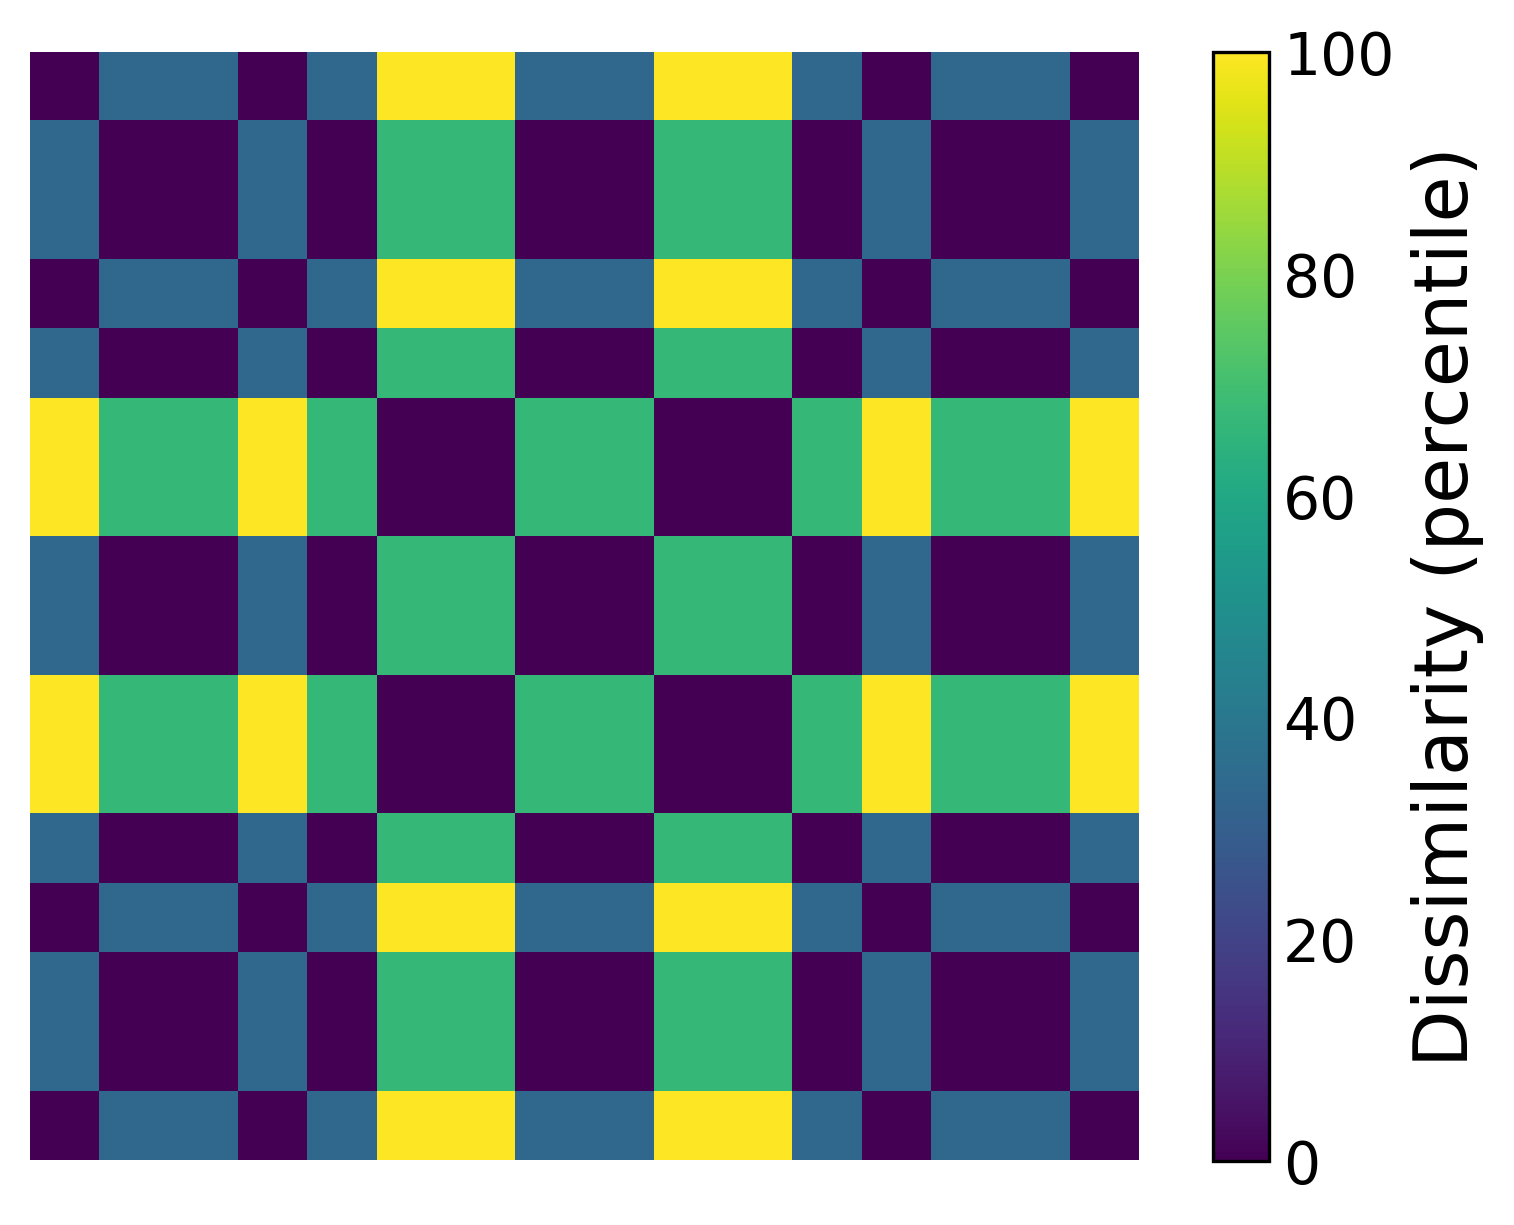

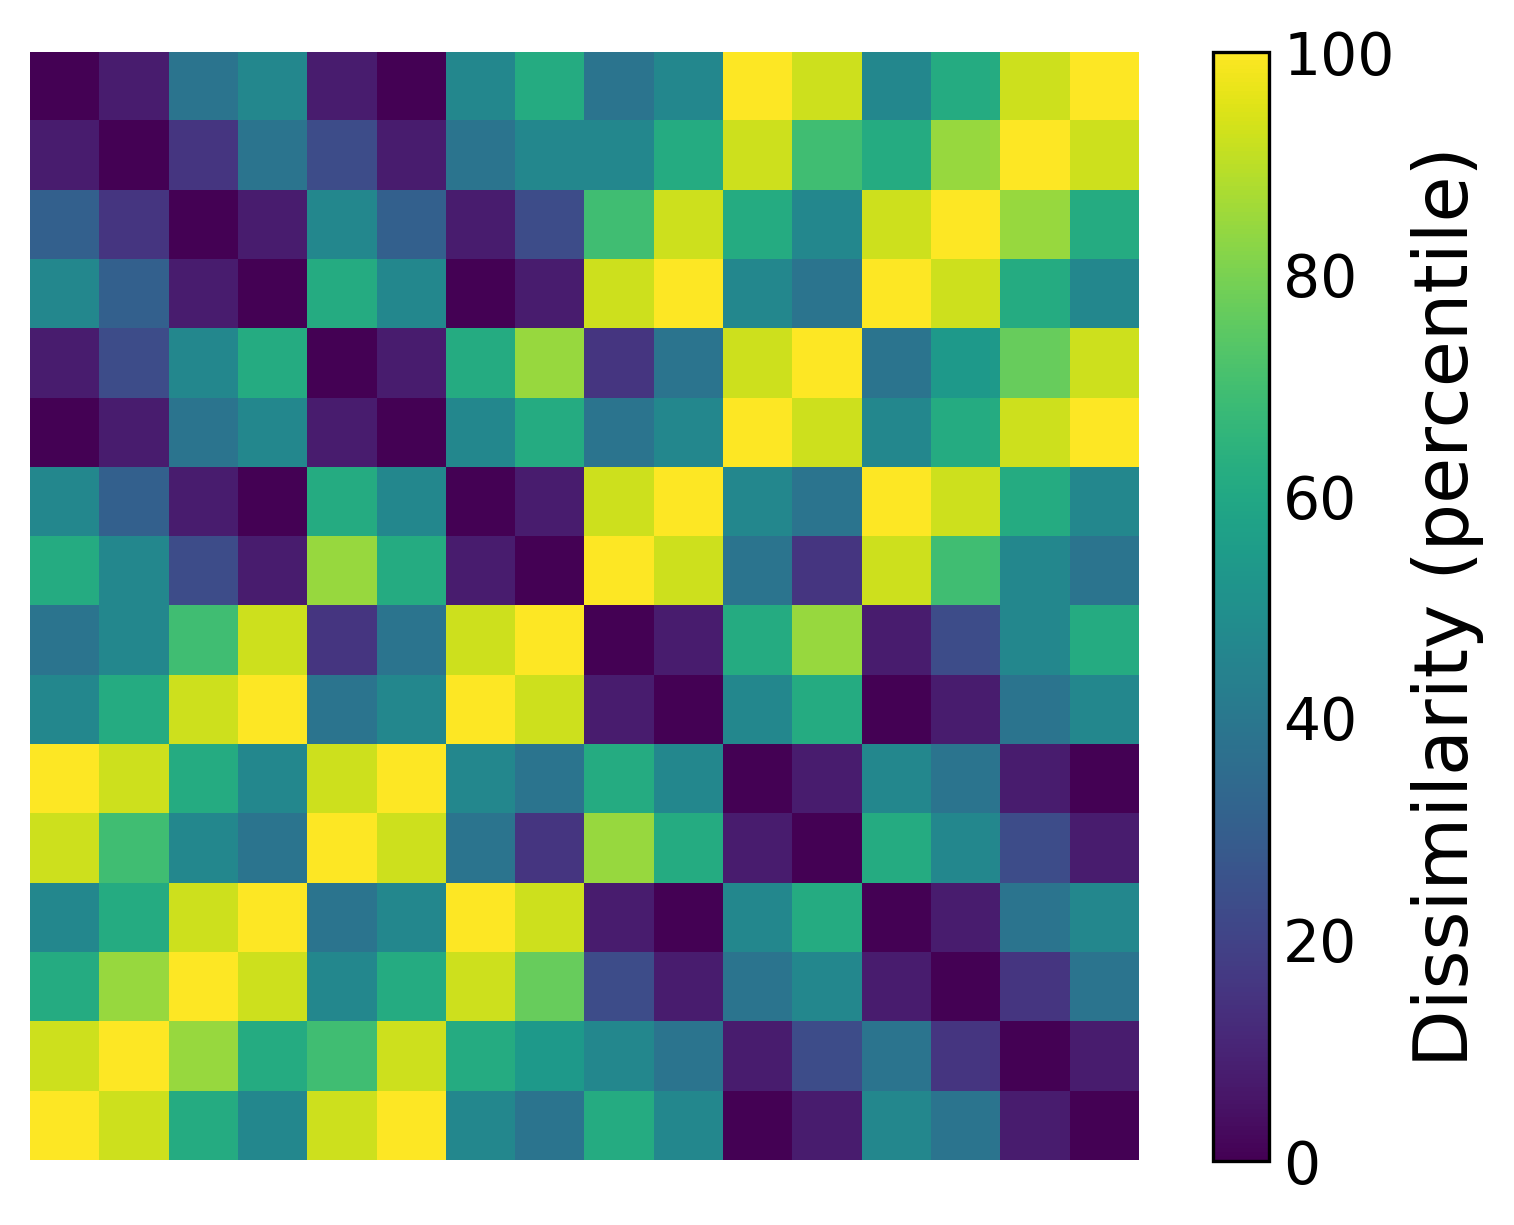

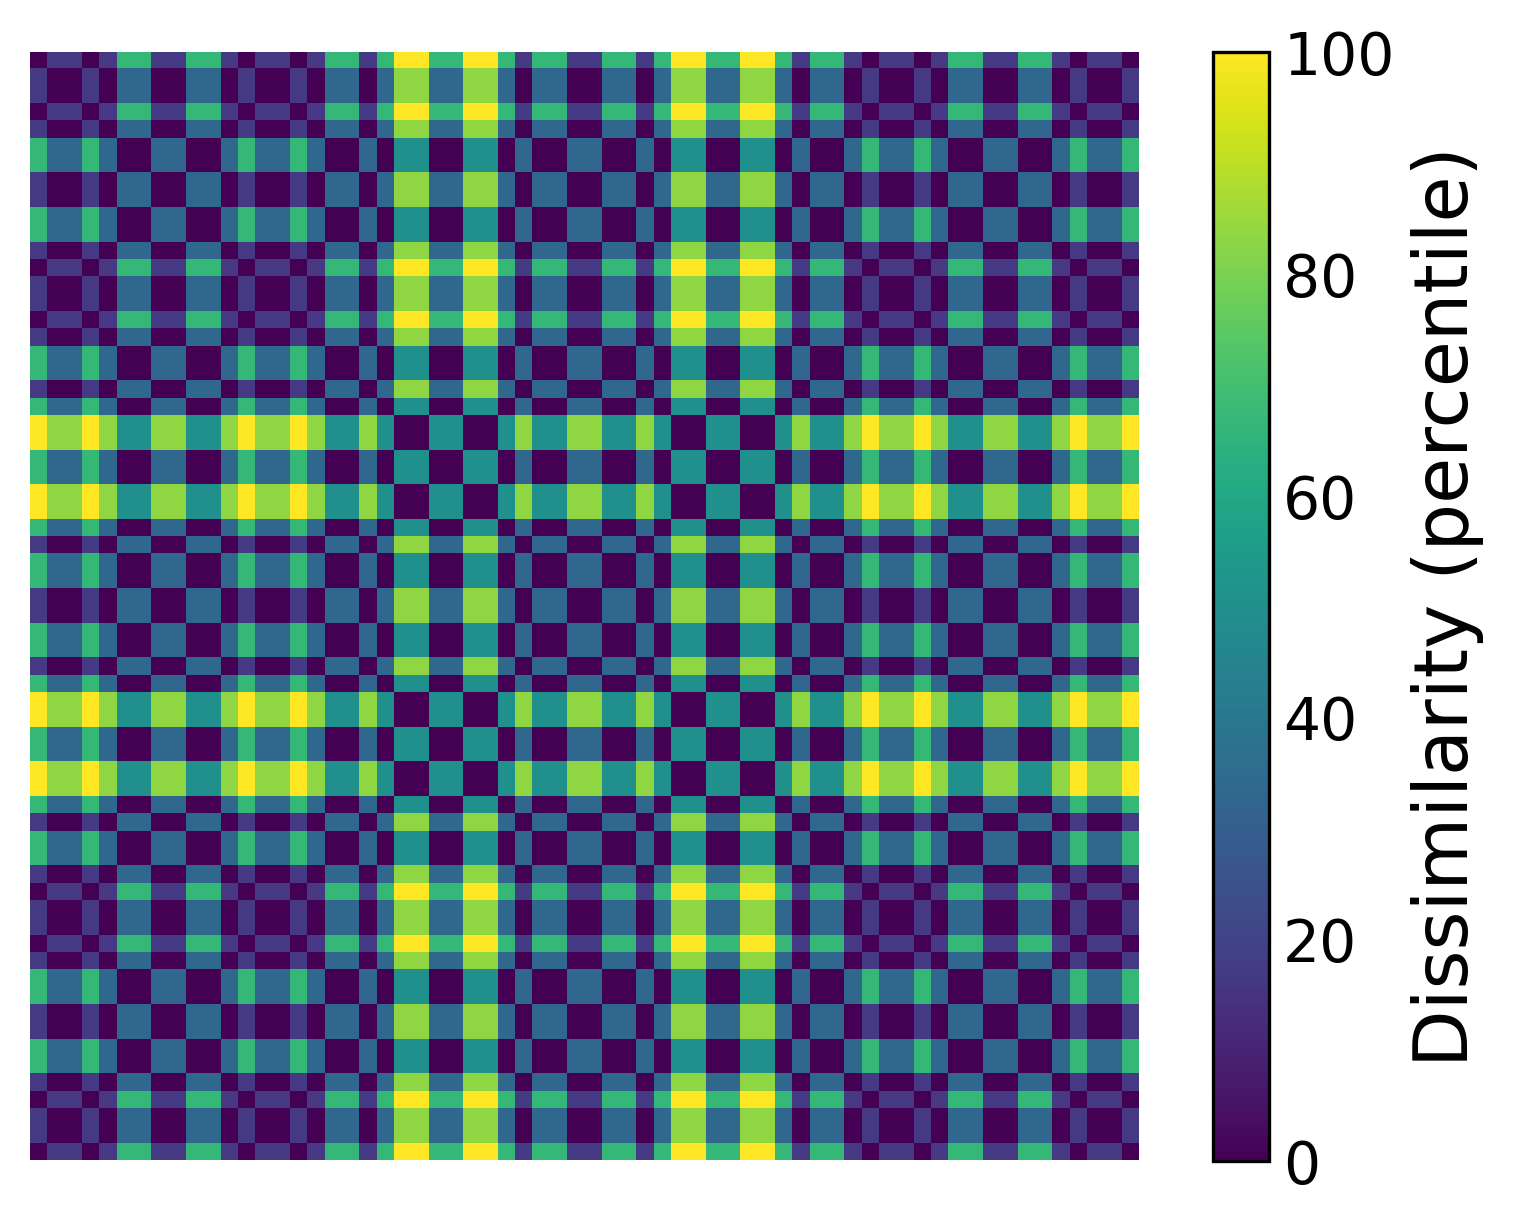

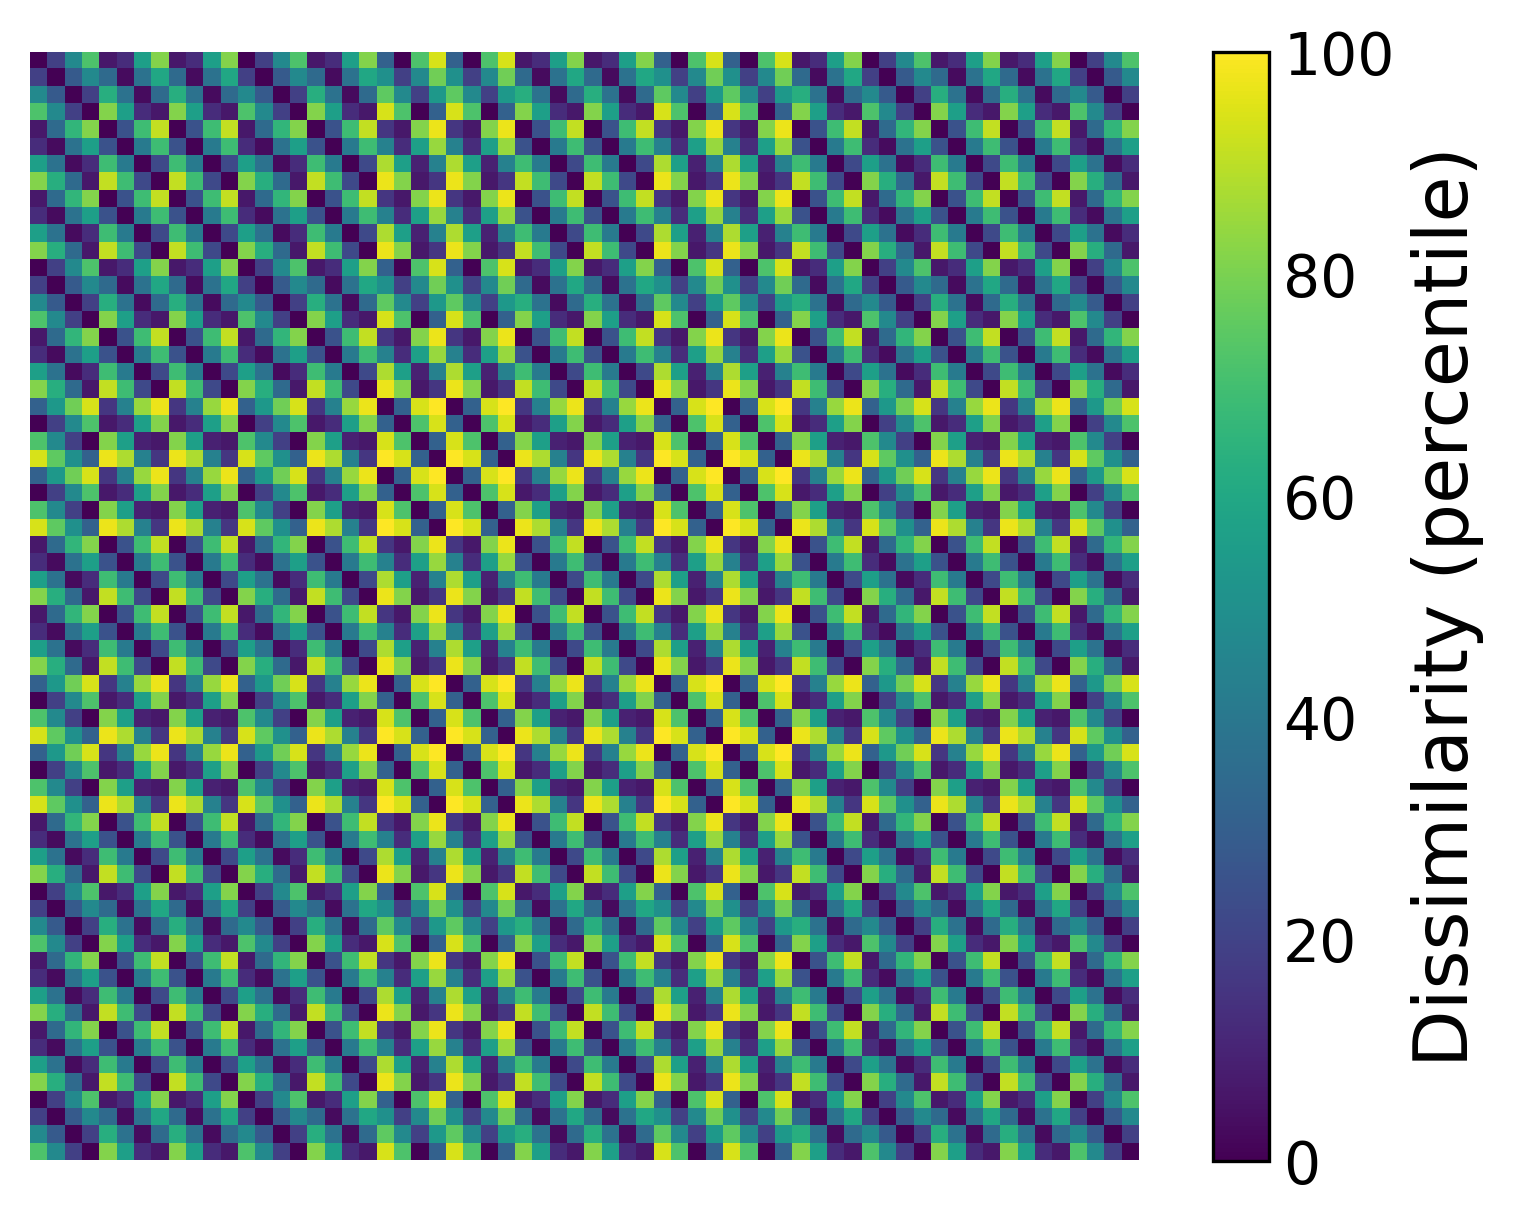

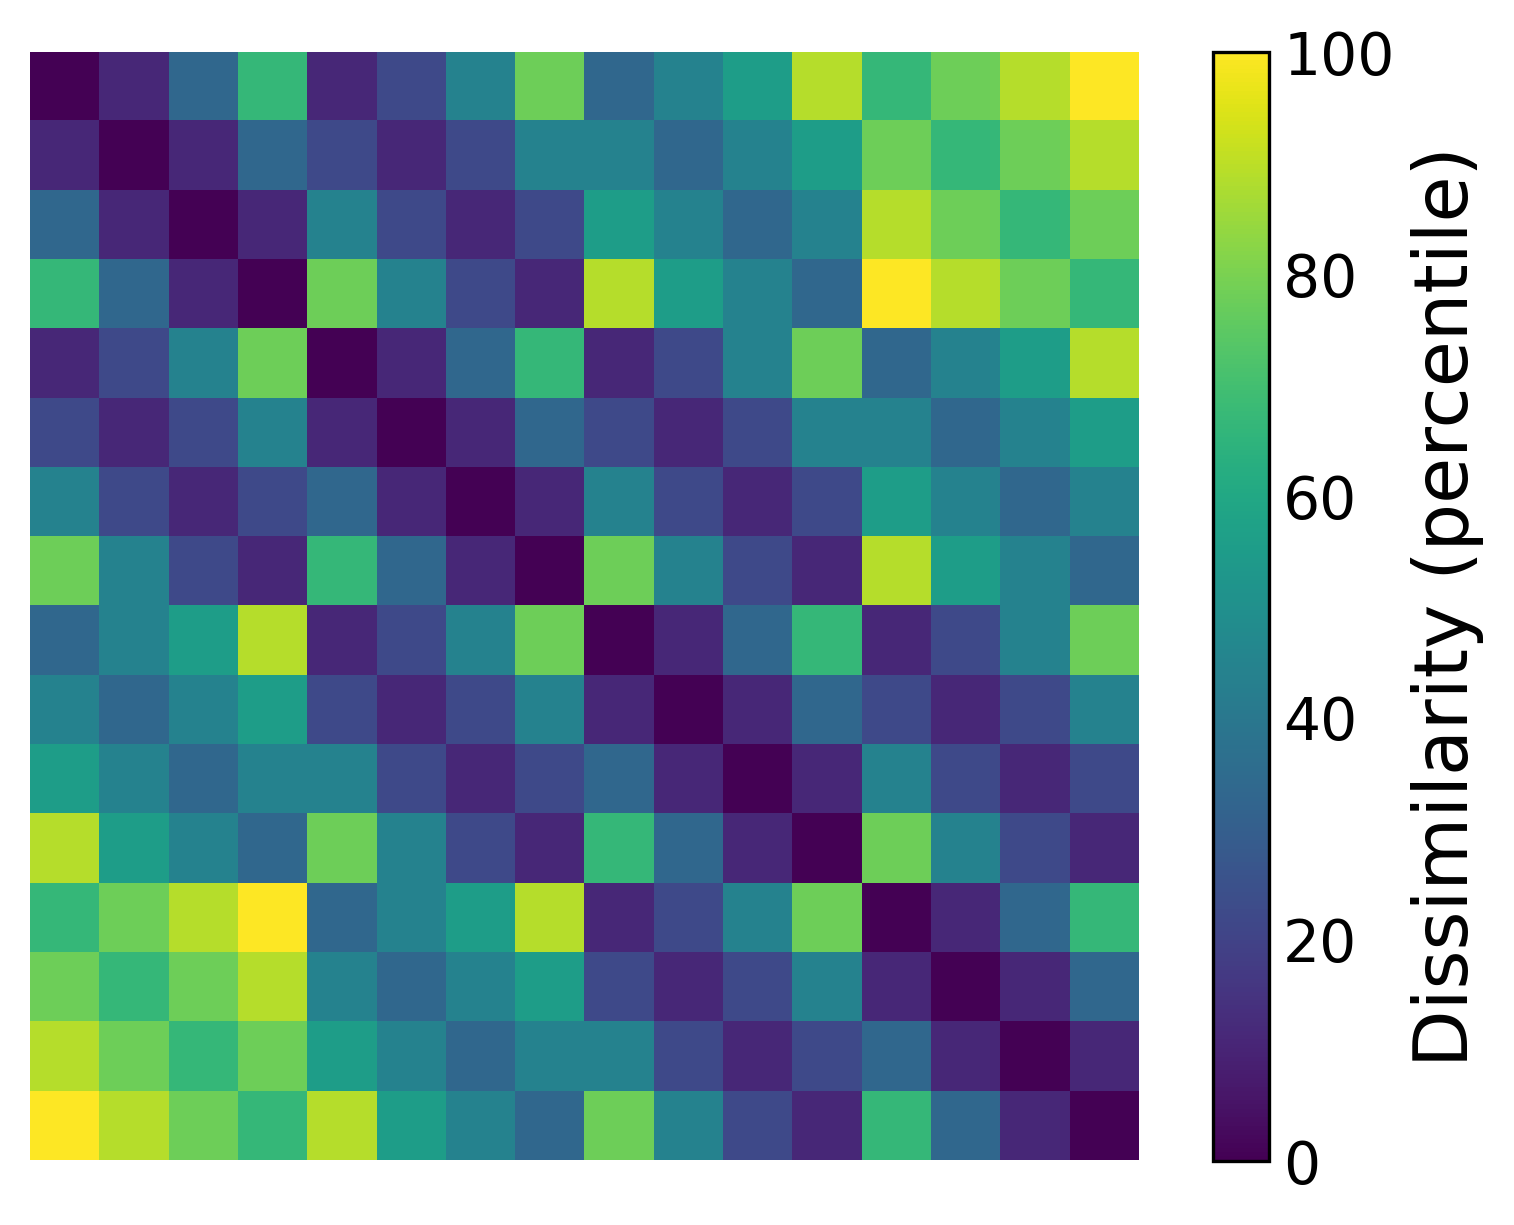

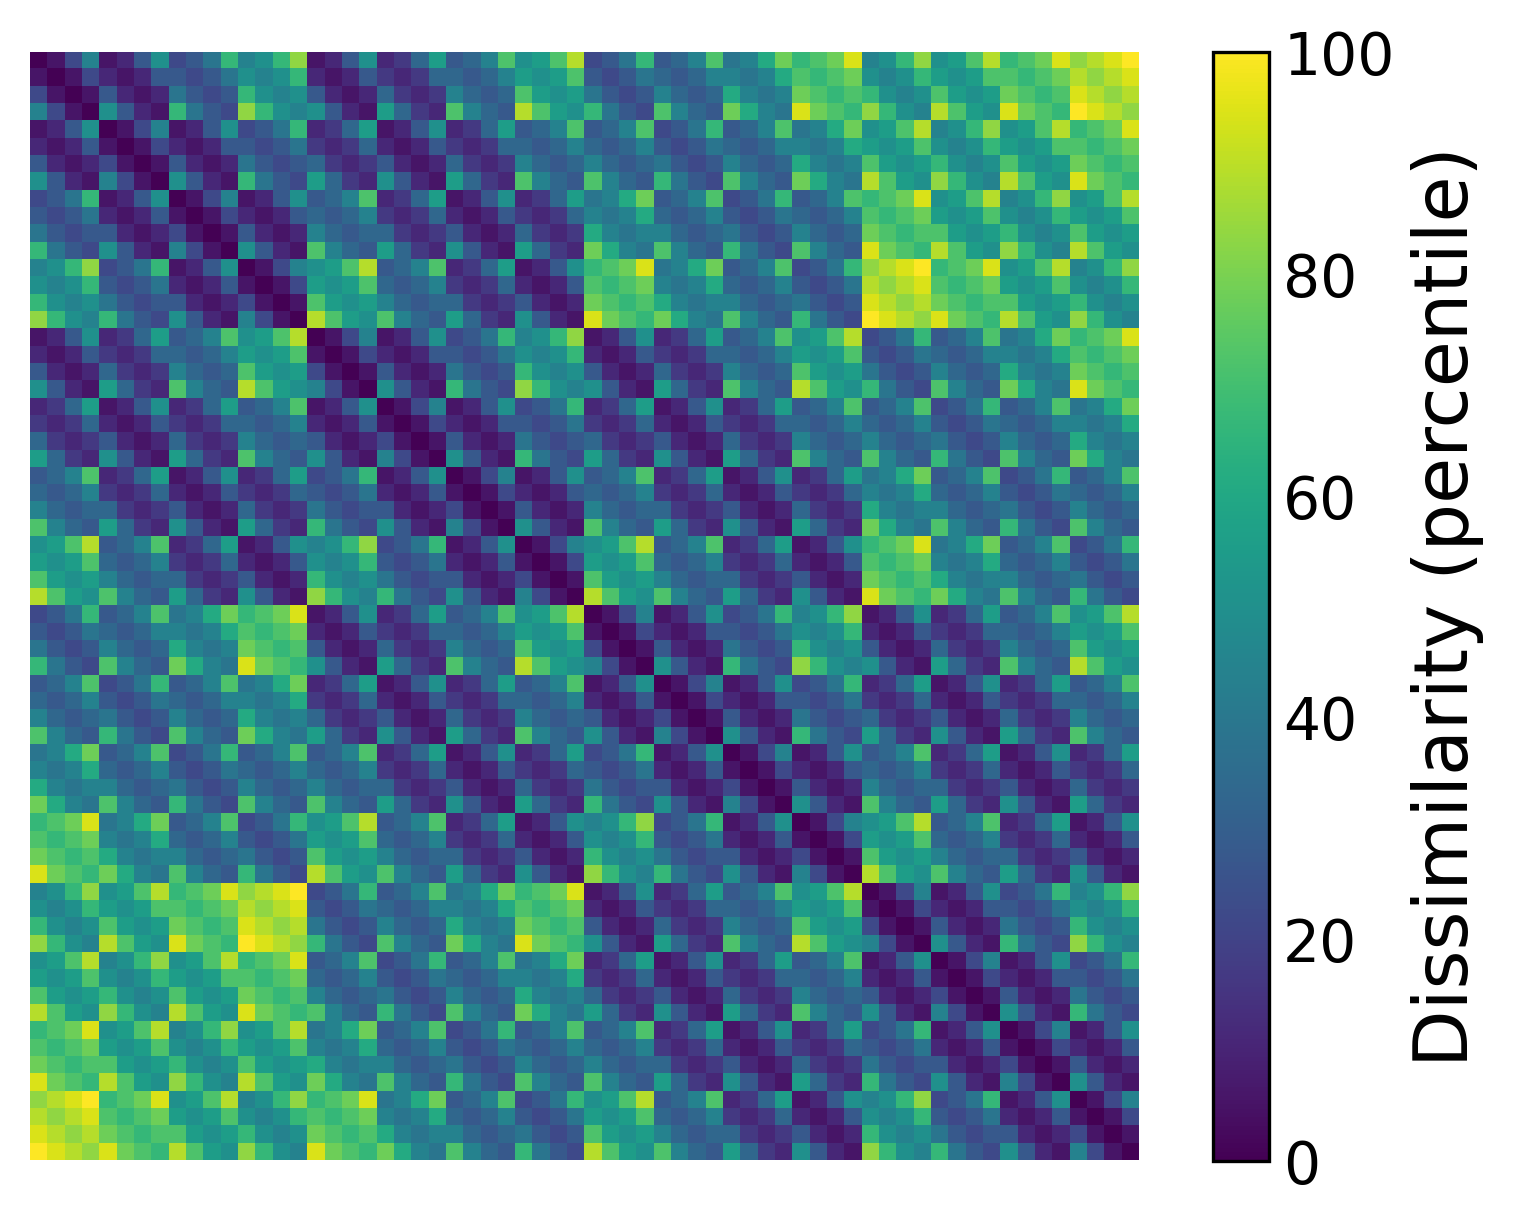

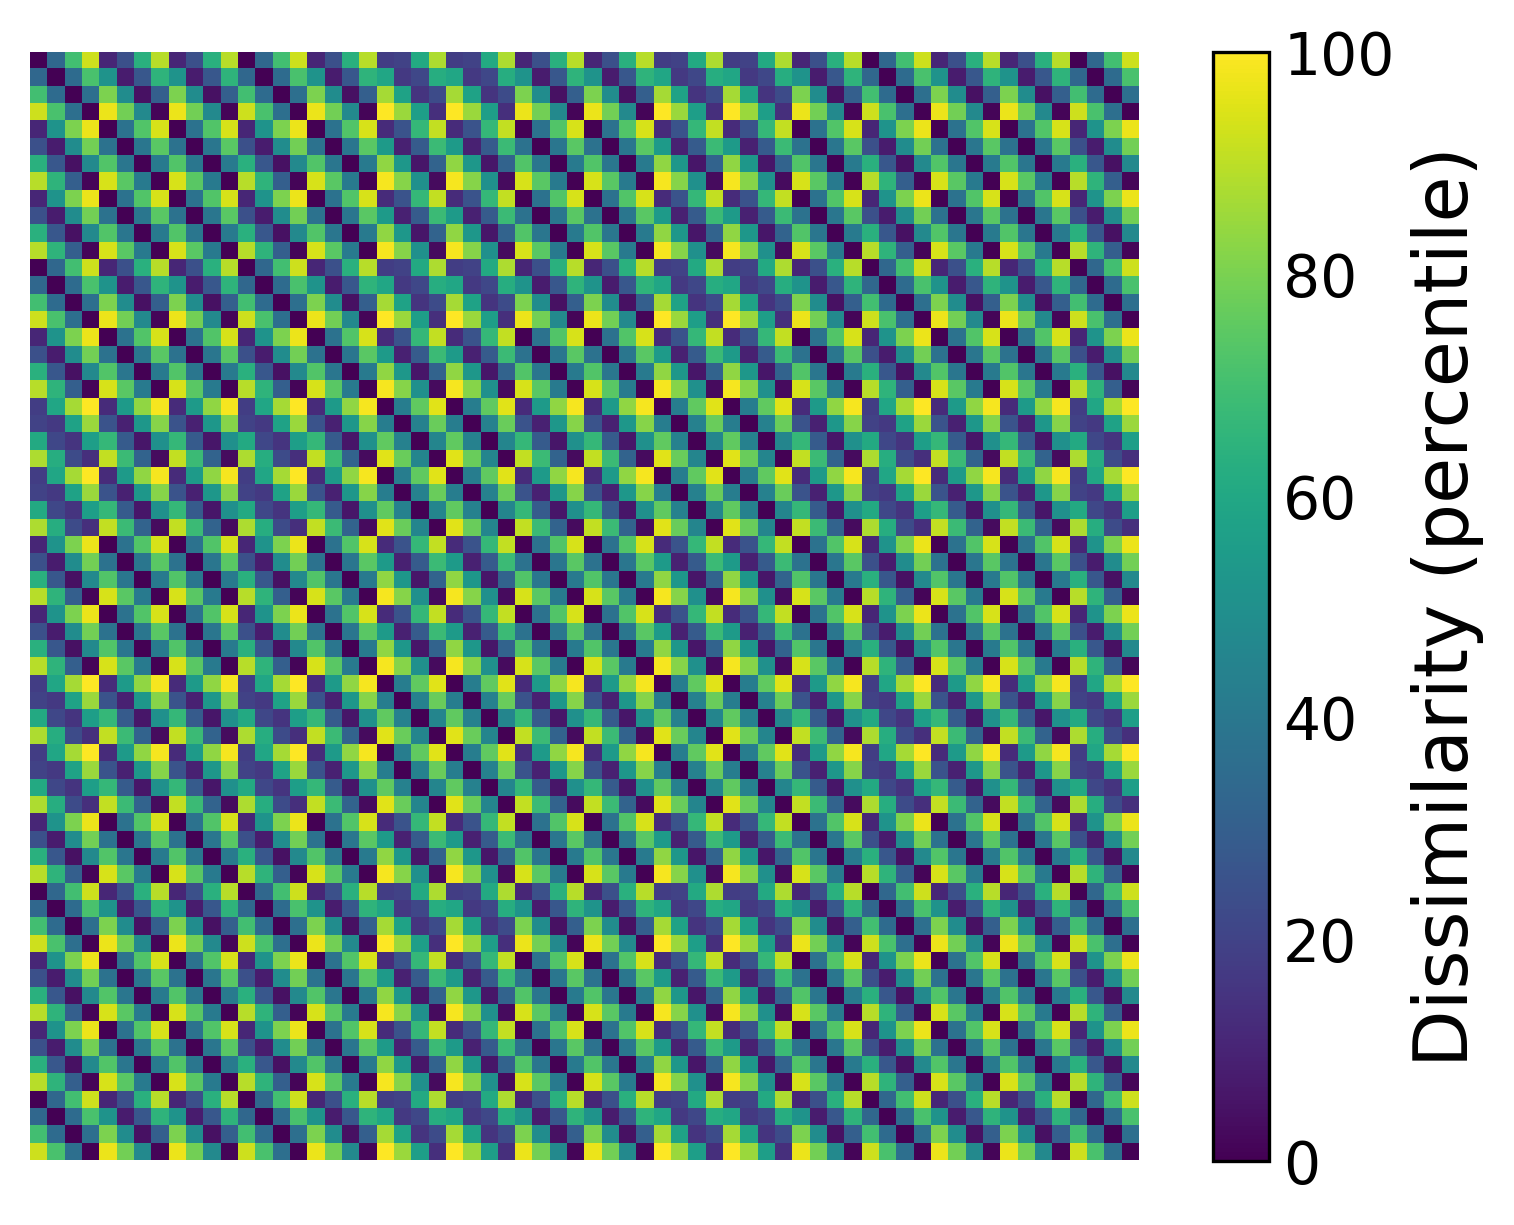

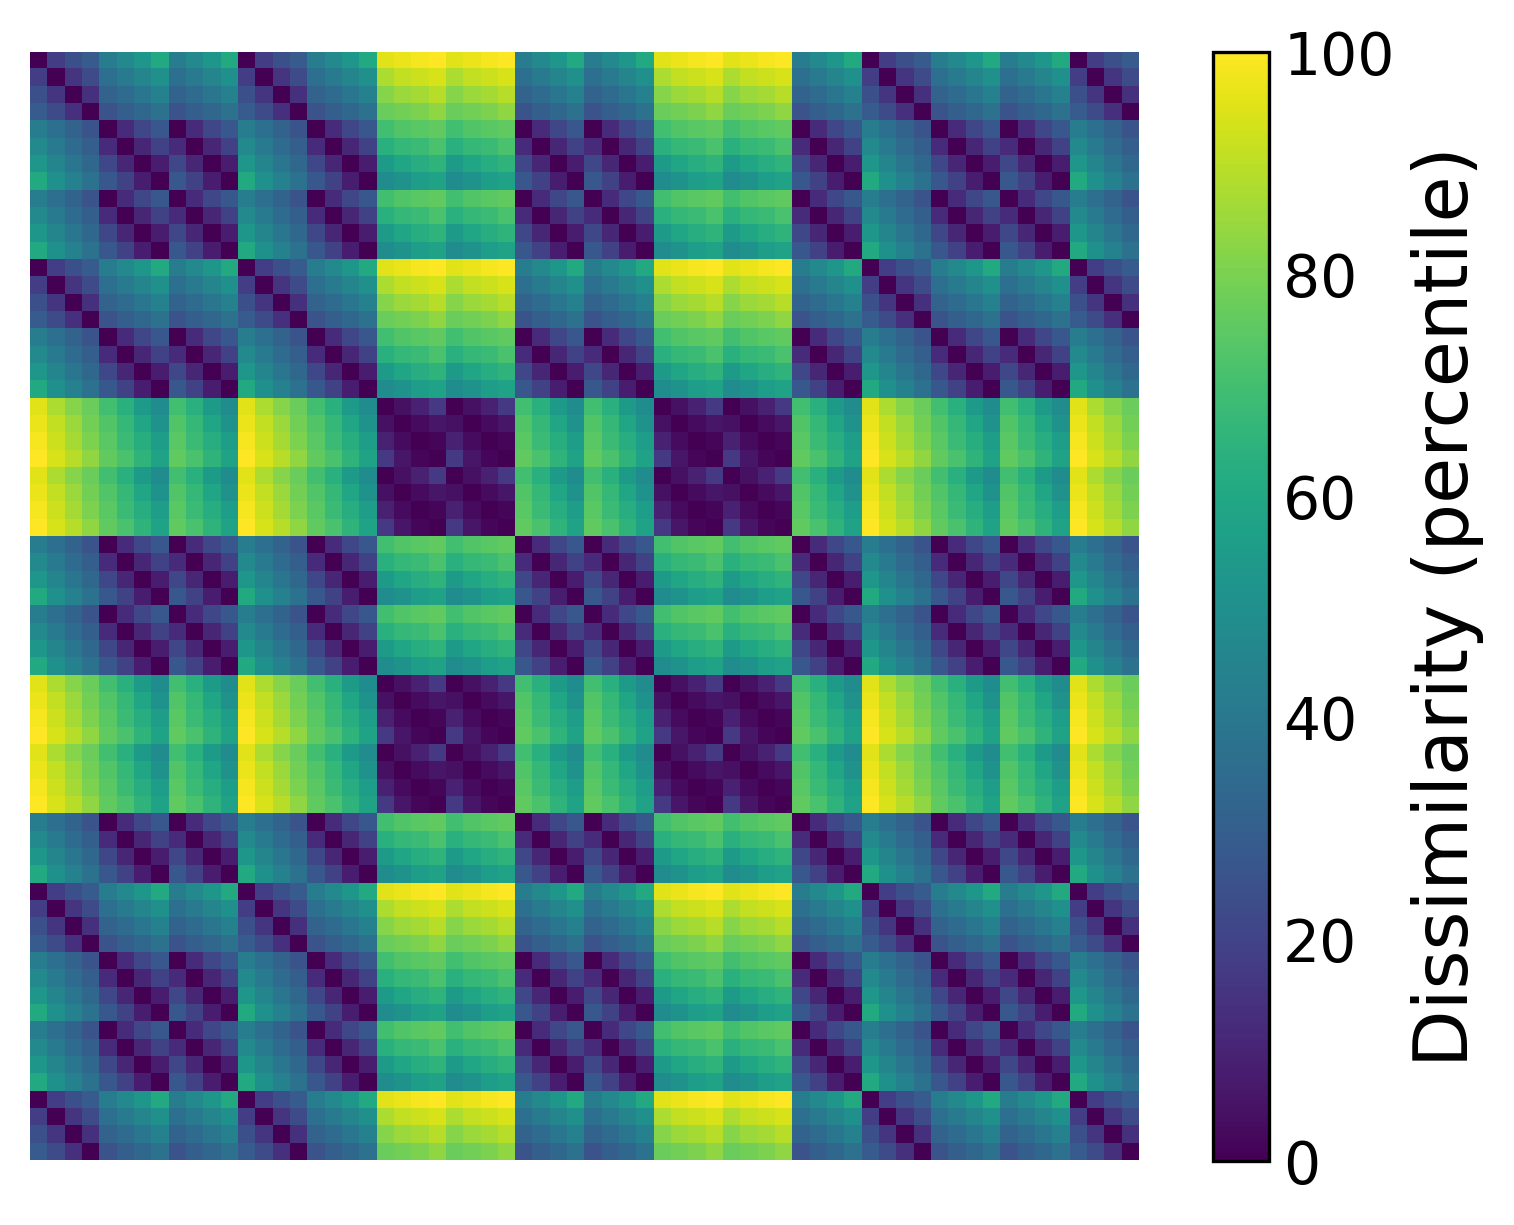

In [21]:
titles = ['X', 'Y', 'Z',
          r'$r$', r'$\theta$', r'$r$-3D', r'$\phi$',
          '2D-integration', '3D-integration',
          r'$r$-3D (head-centered)', r'$\phi$ (head-centered)']

rdms = np.load('model_rdms.npy')

for i in range(11):
    plot_rdm(rdms[i], percentile=True, cmap='viridis', title=titles[i], title_fontsize=20)